In [1]:
!pip install ucimlrepo numpy pandas matplotlib scikit-learn

In [2]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
iris = fetch_ucirepo(id=53)



In [3]:
import pandas as pd
import numpy as np

# Convert features and targets into DataFrames
X = pd.DataFrame(iris.data.features, columns=iris.data.feature_names)
Y = pd.DataFrame(iris.data.targets, columns=iris.data.target_names)

# Optionally, combine features and target into a single DataFrame
iris_dataset = pd.concat([X, Y], axis=1)
iris_dataset.head()


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#checking for null value
iris_dataset.isnull().sum()

,0
sepal length,0
sepal width,0
petal length,0
petal width,0
class,0


### **MultinomialNB Classifier**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def multi_naive_bayes(size):
  #splitting training dataset
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size, random_state=2)

  #Classsification model Naive BAyes
  MultiClassifier=MultinomialNB().fit(X_train,Y_train)

  Y_predict=MultiClassifier.predict(X_test)

  accuracy=accuracy_score(Y_test, Y_predict)
  print("Accuracy Score: ",accuracy)
  print("==================================================")
  print("Confusion Matrix:\n",confusion_matrix(Y_test, Y_predict))
  print("==================================================")
  print("Classification Report:\n",classification_report(Y_test, Y_predict))
  print("==================================================================================")

  return accuracy

In [6]:
# generating report for different test sizes

multi_accuracy_scores=[]
test_sizes=[0.5,0.4,0.3,0.2,0.1]

for size in test_sizes:
  print(f"report of multinomial naive bayes for test size :{size}")
  multi_accuracy_scores.append(multi_naive_bayes(size))


report of multinomial naive bayes for test size :0.5
Accuracy Score:  0.88
Confusion Matrix:
 [[27  0  0]
 [ 0 23  0]
 [ 0  9 16]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        27
Iris-versicolor       0.72      1.00      0.84        23
 Iris-virginica       1.00      0.64      0.78        25

       accuracy                           0.88        75
      macro avg       0.91      0.88      0.87        75
   weighted avg       0.91      0.88      0.88        75

report of multinomial naive bayes for test size :0.4
Accuracy Score:  0.7666666666666667
Confusion Matrix:
 [[23  0  0]
 [ 0 16  0]
 [ 0 14  7]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.53      1.00      0.70        16
 Iris-virginica       1.00      0.33      0.50        21

       accuracy                           0.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

## Bargraph of accuracy scores

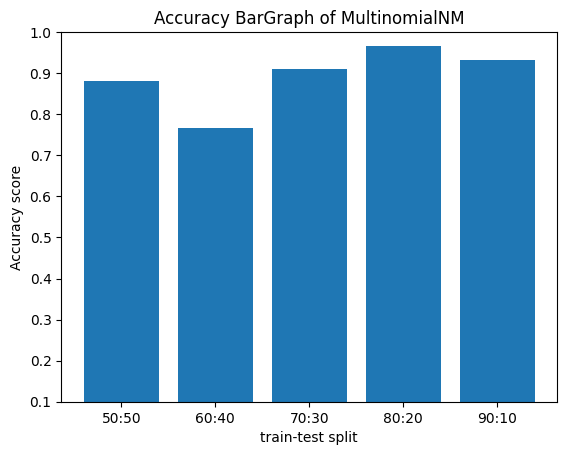

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x=np.array(["50:50","60:40","70:30","80:20","90:10"])
y=np.array(multi_accuracy_scores)

plt.bar(x,y,align='center')
plt.title('Accuracy BarGraph of MultinomialNM')
plt.xlabel('train-test split')
plt.ylim(0.1,1.0)
plt.ylabel('Accuracy score')
plt.show()



# Breast Cancer Dataset

In [19]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer = fetch_ucirepo(id=17)

print(breast_cancer)

{'data': {'ids':            ID
0      842302
1      842517
2    84300903
3    84348301
4    84358402
..        ...
564    926424
565    926682
566    926954
567    927241
568     92751

[569 rows x 1 columns], 'features':      radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      

In [20]:
import pandas as pd
import numpy as np

# Convert features and targets into DataFrames
cancer_features = pd.DataFrame(breast_cancer.data.features, columns=breast_cancer.data.feature_names)
cancer_targets = pd.DataFrame(breast_cancer.data.targets, columns=breast_cancer.data.target_names)

# Optionally, combine features and target into a single DataFrame
breast_cancer_dataset = pd.concat([cancer_features, cancer_targets], axis=1)
breast_cancer_dataset.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [21]:
breast_cancer_dataset.isnull().sum()

,0
radius1,0
texture1,0
perimeter1,0
area1,0
smoothness1,0
compactness1,0
concavity1,0
concave_points1,0
symmetry1,0
fractal_dimension1,0


### Multinomial NB Classifier


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def multi_naive_bayes(size):
  #splitting training dataset
  X_train, X_test, Y_train, Y_test = train_test_split(cancer_features, cancer_targets, test_size=size, random_state=2)

  #Classsification model Naive BAyes
  MultiClassifier=MultinomialNB().fit(X_train,Y_train)

  Y_predict=MultiClassifier.predict(X_test)

  accuracy=accuracy_score(Y_test, Y_predict)
  print("Accuracy Score: ",accuracy)
  print("==================================================")
  print("Confusion Matrix:\n",confusion_matrix(Y_test, Y_predict))
  print("==================================================")
  print("Classification Report:\n",classification_report(Y_test, Y_predict))
  print("==================================================================================")

  return accuracy

In [23]:
# generating report for different test sizes

multi_accuracy_scores=[]
test_sizes=[0.5,0.4,0.3,0.2,0.1]

for size in test_sizes:
  print(f"report of multinomial naive bayes for test size :{size}")
  multi_accuracy_scores.append(multi_naive_bayes(size))

report of multinomial naive bayes for test size :0.5
Accuracy Score:  0.887719298245614
Confusion Matrix:
 [[169   6]
 [ 26  84]]
Classification Report:
               precision    recall  f1-score   support

           B       0.87      0.97      0.91       175
           M       0.93      0.76      0.84       110

    accuracy                           0.89       285
   macro avg       0.90      0.86      0.88       285
weighted avg       0.89      0.89      0.89       285

report of multinomial naive bayes for test size :0.4
Accuracy Score:  0.8859649122807017
Confusion Matrix:
 [[134   6]
 [ 20  68]]
Classification Report:
               precision    recall  f1-score   support

           B       0.87      0.96      0.91       140
           M       0.92      0.77      0.84        88

    accuracy                           0.89       228
   macro avg       0.89      0.86      0.88       228
weighted avg       0.89      0.89      0.88       228

report of multinomial naive bayes for

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

#### Bargraph

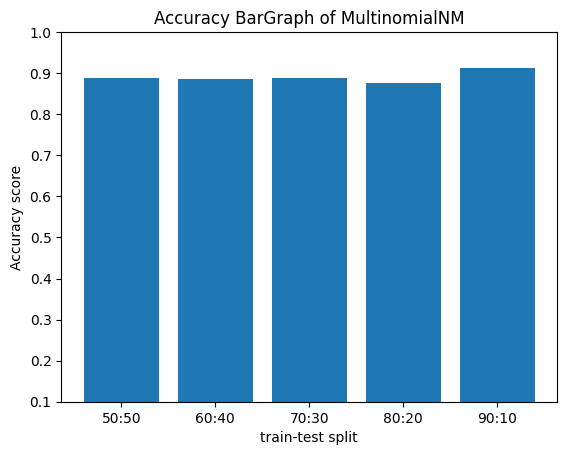

In [24]:
import matplotlib.pyplot as plt
import numpy as np

x=np.array(["50:50","60:40","70:30","80:20","90:10"])
y=np.array(multi_accuracy_scores)

plt.bar(x,y,align='center')
plt.title('Accuracy BarGraph of MultinomialNM')
plt.xlabel('train-test split')
plt.ylim(0.1,1.0)
plt.ylabel('Accuracy score')
plt.show()

### Gaussian NB Classifier

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def gauss_naive_bayes(size):
  #splitting training dataset
  X_train, X_test, Y_train, Y_test = train_test_split(cancer_features, cancer_targets, test_size=size, random_state=42)

  #Classsification model Naive BAyes
  GaussClassifier=GaussianNB().fit(X_train,Y_train)
  # predicting testing dataset
  Y_predict=GaussClassifier.predict(X_test)

  accuracy=accuracy_score(Y_test, Y_predict)
  print("Accuracy Score: ",accuracy)
  print("==================================================")
  print("Confusion Matrix:\n",confusion_matrix(Y_test, Y_predict))
  print("==================================================")
  print("Classification Report:\n",classification_report(Y_test, Y_predict))
  print("==================================================================================")

  return accuracy

In [26]:
# generating report for different test sizes

gauss_accuracy_scores=[]
test_sizes=[0.5,0.4,0.3,0.2,0.1]

for size in test_sizes:
  print(f"report of gaussian naive bayes for test size :{size}")
  gauss_accuracy_scores.append(gauss_naive_bayes(size))

report of gaussian naive bayes for test size :0.5
Accuracy Score:  0.9438596491228071
Confusion Matrix:
 [[180   7]
 [  9  89]]
Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.96      0.96       187
           M       0.93      0.91      0.92        98

    accuracy                           0.94       285
   macro avg       0.94      0.94      0.94       285
weighted avg       0.94      0.94      0.94       285

report of gaussian naive bayes for test size :0.4
Accuracy Score:  0.9517543859649122
Confusion Matrix:
 [[144   4]
 [  7  73]]
Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.97      0.96       148
           M       0.95      0.91      0.93        80

    accuracy                           0.95       228
   macro avg       0.95      0.94      0.95       228
weighted avg       0.95      0.95      0.95       228

report of gaussian naive bayes for test si

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

#### Bargraph

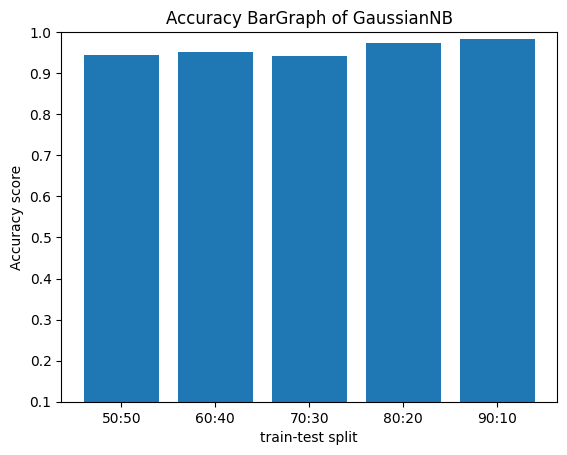

In [27]:
import matplotlib.pyplot as plt
import numpy as np

x=np.array(["50:50","60:40","70:30","80:20","90:10"])
y=np.array(gauss_accuracy_scores)

plt.bar(x,y,align='center')
plt.title('Accuracy BarGraph of GaussianNB')
plt.xlabel('train-test split')
plt.ylim(0.1,1.0)
plt.ylabel('Accuracy score')
plt.show()

### Bernoulli NB Classifier

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def bernoulli_naive_bayes(size):
  #splitting training dataset
  X_train, X_test, Y_train, Y_test = train_test_split(cancer_features, cancer_targets, test_size=size, random_state=2)

  #Classsification model Naive BAyes
  BernClassifier=BernoulliNB(alpha=1.0,binarize=2.0,fit_prior=True,class_prior=None).fit(X_train,Y_train)
  # predicting testing dataset
  Y_predict=BernClassifier.predict(X_test)


  accuracy = accuracy_score(Y_test, Y_predict)
  print("Accuracy Score: ",accuracy)
  print("==================================================")
  print("Confusion Matrix:\n",confusion_matrix(Y_test, Y_predict))
  print("==================================================")
  print("Classification Report:\n",classification_report(Y_test, Y_predict))

  return accuracy


In [29]:
# generating report for different test sizes

bernoulli_accuracy_scores=[]
test_sizes=[0.5,0.4,0.3,0.2,0.1]

for size in test_sizes:
  print(f"report of bernoulli naive bayes for test size :{size}")
  bernoulli_accuracy_scores.append(bernoulli_naive_bayes(size))

report of bernoulli naive bayes for test size :0.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score:  0.6771929824561403
Confusion Matrix:
 [[95 80]
 [12 98]]
Classification Report:
               precision    recall  f1-score   support

           B       0.89      0.54      0.67       175
           M       0.55      0.89      0.68       110

    accuracy                           0.68       285
   macro avg       0.72      0.72      0.68       285
weighted avg       0.76      0.68      0.68       285

report of bernoulli naive bayes for test size :0.4
Accuracy Score:  0.7105263157894737
Confusion Matrix:
 [[91 49]
 [17 71]]
Classification Report:
               precision    recall  f1-score   support

           B       0.84      0.65      0.73       140
           M       0.59      0.81      0.68        88

    accuracy                           0.71       228
   macro avg       0.72      0.73      0.71       228
weighted avg       0.75      0.71      0.71       228

report of bernoulli naive bayes for test size :0.3
Accuracy Score:  0.6666666666666666
Confusion Ma

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

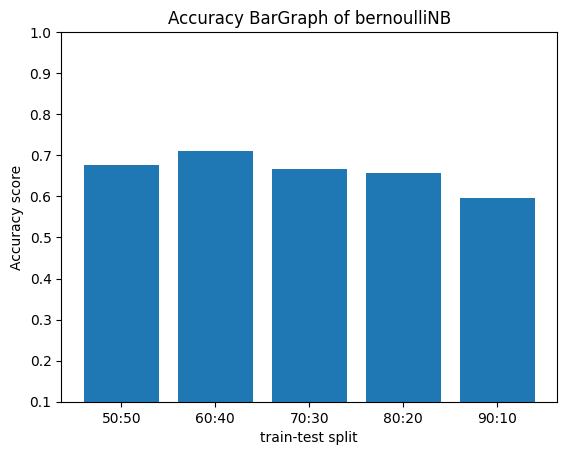

In [30]:
import matplotlib.pyplot as plt
import numpy as np

x=np.array(["50:50","60:40","70:30","80:20","90:10"])
y=np.array(bernoulli_accuracy_scores)

plt.bar(x,y,align='center')
plt.title('Accuracy BarGraph of bernoulliNB')
plt.xlabel('train-test split')
plt.ylim(0.1,1.0)
plt.ylabel('Accuracy score')
plt.show()

### Decision Tree Classifier

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def decision_tree(size):
  #splitting training dataset
  X_train, X_test, Y_train, Y_test = train_test_split(cancer_features, cancer_targets, test_size=size, random_state=2)

  #Classsification model Descision tree
  DescisionClassifier=DecisionTreeClassifier().fit(X_train,Y_train)
  # predicting testing dataset
  Y_predict=DescisionClassifier.predict(X_test)


  accuracy = accuracy_score(Y_test, Y_predict)
  print("Accuracy Score: ",accuracy)
  print("==================================================")
  print("Confusion Matrix:\n",confusion_matrix(Y_test, Y_predict))
  print("==================================================")
  print("Classification Report:\n",classification_report(Y_test, Y_predict))

  return accuracy


In [32]:
# generating report for different test sizes

decision_tree_accuracy_scores=[]
test_sizes=[0.5,0.4,0.3,0.2,0.1]

for size in test_sizes:
  print(f"report of decision_tree for test size :{size}")
  decision_tree_accuracy_scores.append(decision_tree(size))

report of decision_tree for test size :0.5
Accuracy Score:  0.8947368421052632
Confusion Matrix:
 [[156  19]
 [ 11  99]]
Classification Report:
               precision    recall  f1-score   support

           B       0.93      0.89      0.91       175
           M       0.84      0.90      0.87       110

    accuracy                           0.89       285
   macro avg       0.89      0.90      0.89       285
weighted avg       0.90      0.89      0.90       285

report of decision_tree for test size :0.4
Accuracy Score:  0.9078947368421053
Confusion Matrix:
 [[126  14]
 [  7  81]]
Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.90      0.92       140
           M       0.85      0.92      0.89        88

    accuracy                           0.91       228
   macro avg       0.90      0.91      0.90       228
weighted avg       0.91      0.91      0.91       228

report of decision_tree for test size :0.3
Accuracy Scor

#### Bargraph

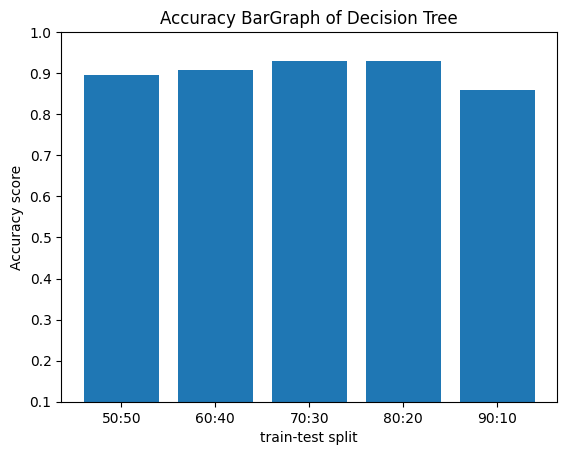

In [33]:
import matplotlib.pyplot as plt
import numpy as np

x=np.array(["50:50","60:40","70:30","80:20","90:10"])
y=np.array(decision_tree_accuracy_scores)

plt.bar(x,y,align='center')
plt.title('Accuracy BarGraph of Decision Tree')
plt.xlabel('train-test split')
plt.ylim(0.1,1.0)
plt.ylabel('Accuracy score')
plt.show()

#### Decision tree image

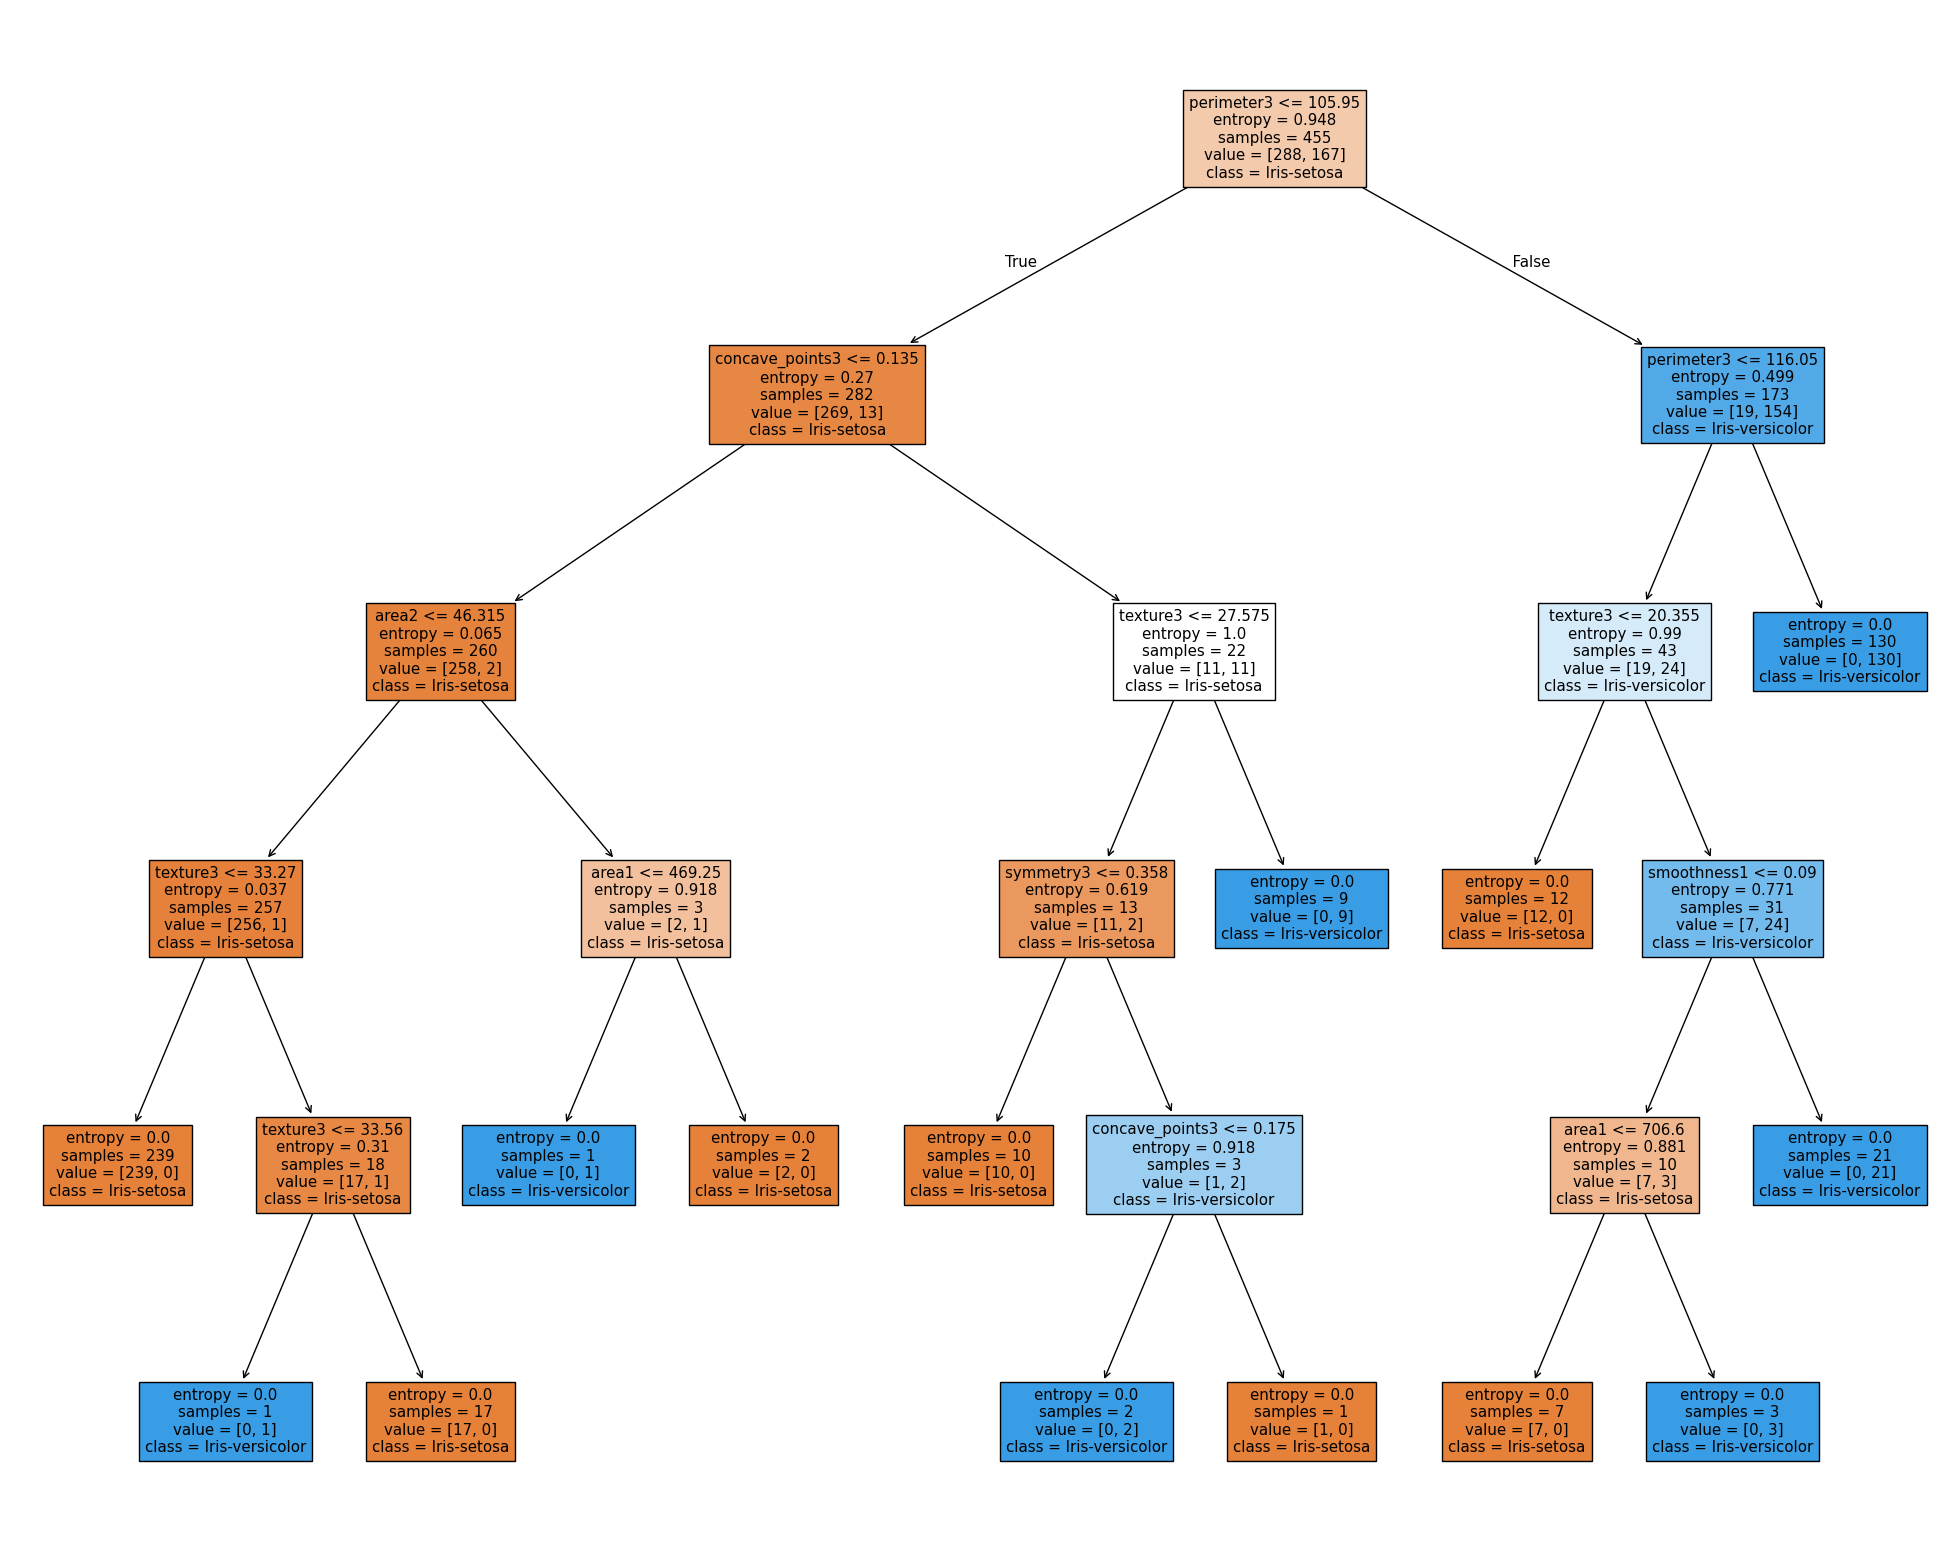

Decision Tree for Breast Cancer dataset for entropy saved as Iris_decision_tree_entropy.png



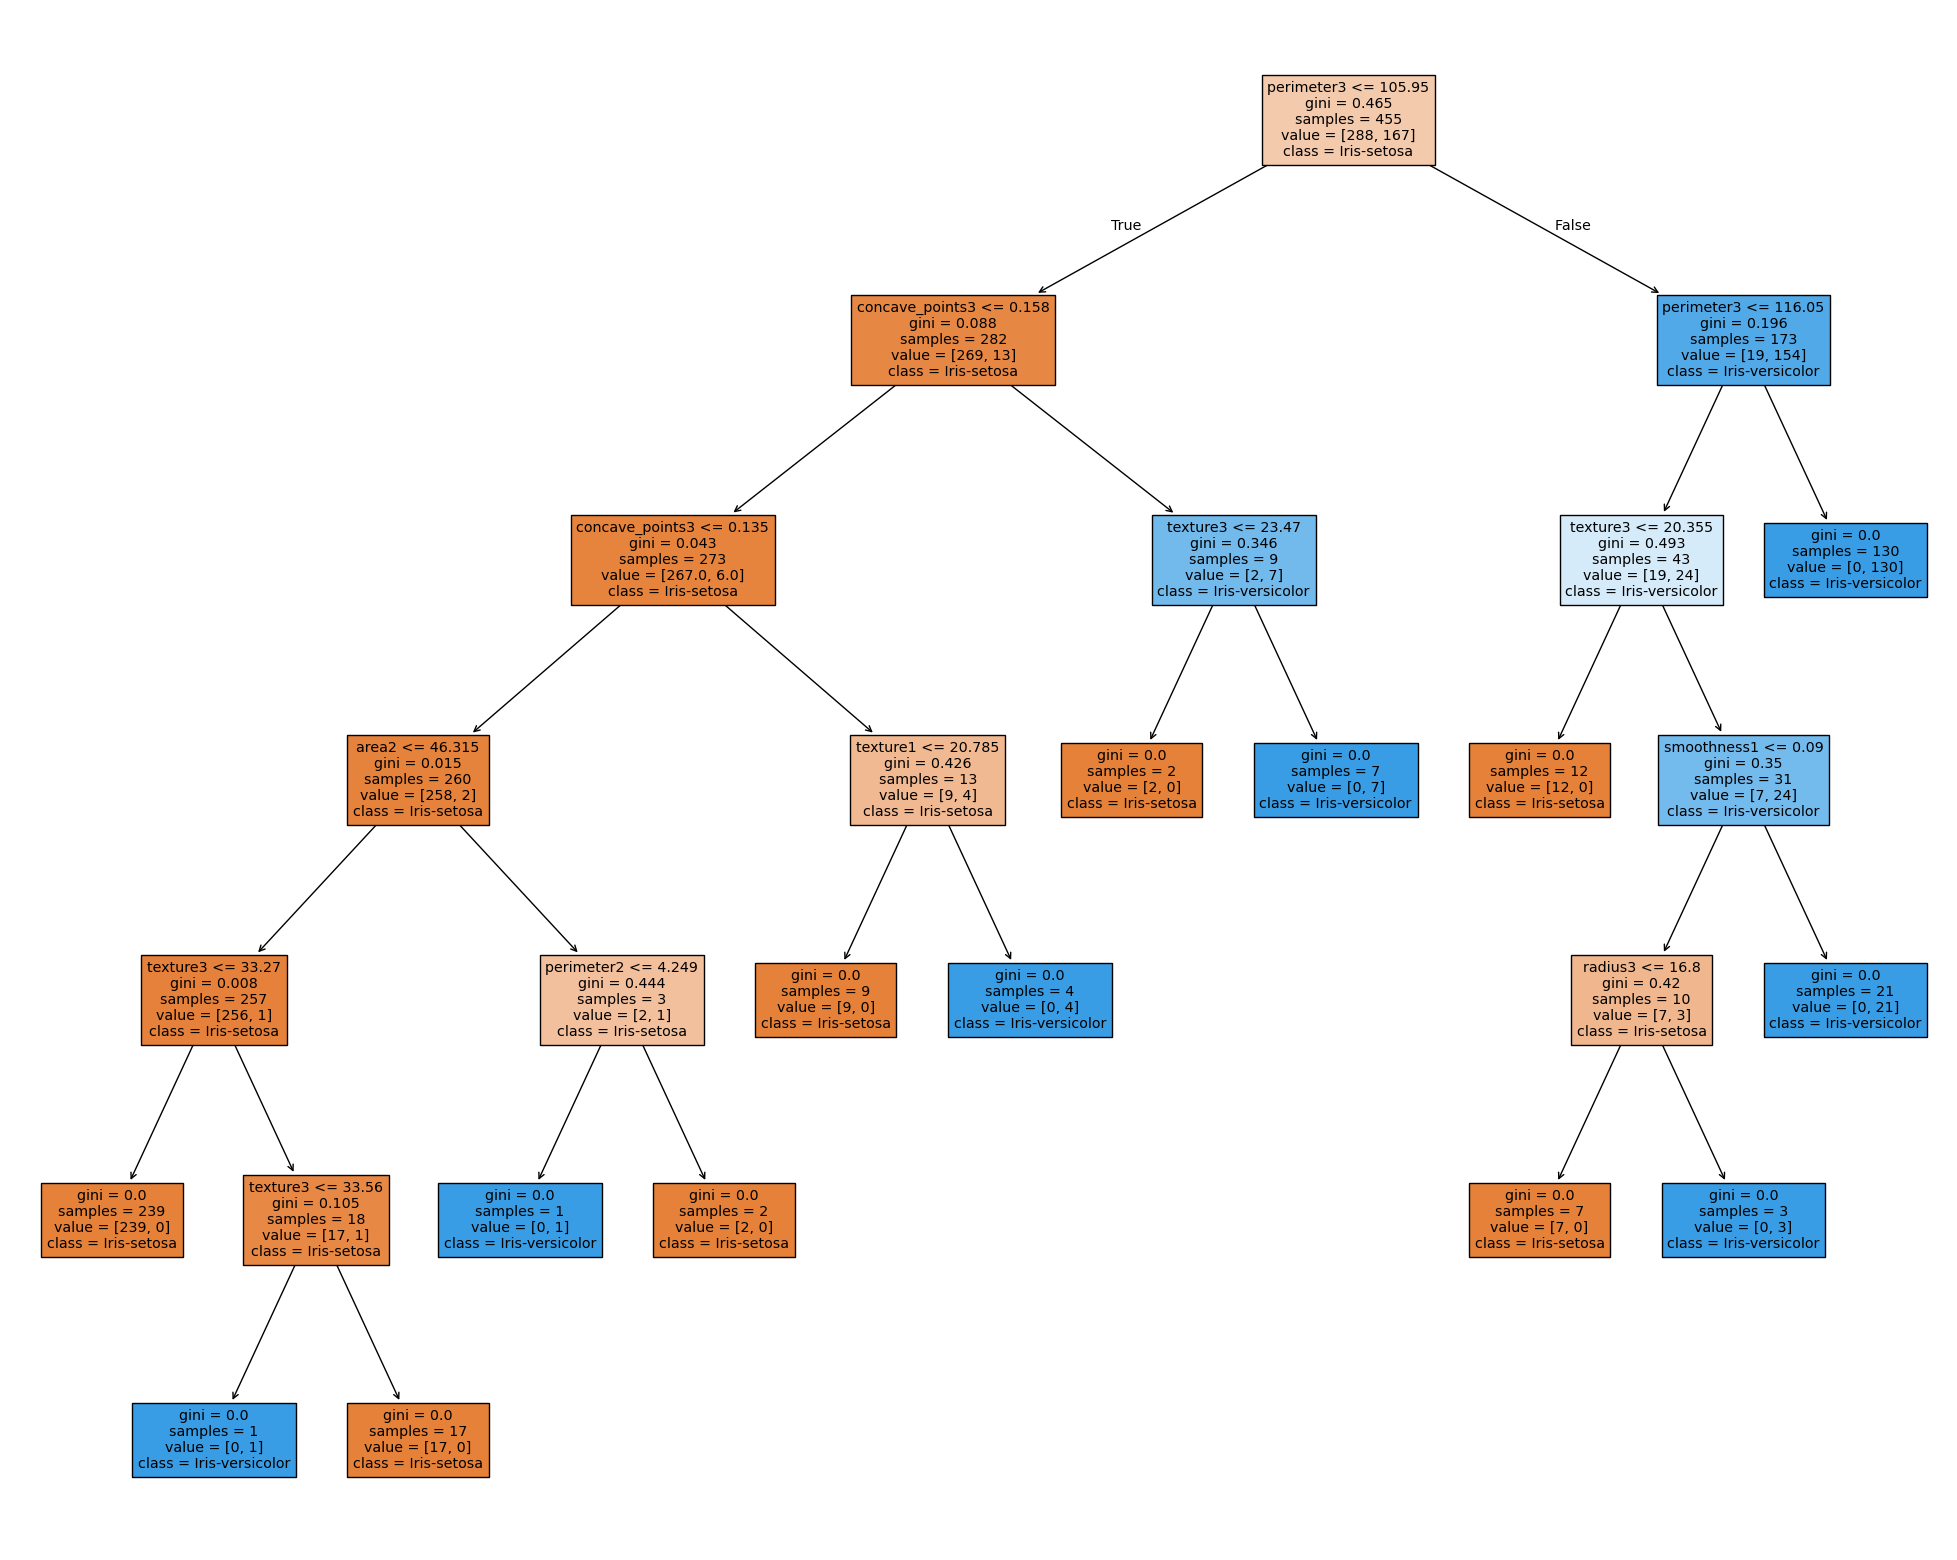

Decision Tree for Breast Cancer dataset for gini saved as Iris_decision_tree_gini.png



In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

criterions=['entropy','gini']


for criteria in criterions:
  fig = plt.figure(figsize=(25, 20))
  X_train, X_test, Y_train, Y_test = train_test_split(cancer_features, cancer_targets, test_size=0.2, random_state=2)
  DescisionClassifier_iris = DecisionTreeClassifier(criterion=criteria).fit(X_train,Y_train)
  _ = plot_tree(DescisionClassifier_iris, feature_names=cancer_features.columns,
  class_names=[str(name) for name in Y[Y.columns[0]].unique()], filled=True)
  fig.savefig(f'Breast cancer_decision_tree_{criteria}.png')
  plt.show()
  plt.close(fig)
  print(f'Decision Tree for Breast Cancer dataset for {criteria} saved as Iris_decision_tree_{criteria}.png')
  print('=============================================================================================')
  print()

In [ ]:
import pprint
from sklearn.model_selection import GridSearchCV
X_train, X_test, Y_train, Y_test = train_test_split(cancer_features, cancer_targets, test_size=0.2, random_state=2)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, None],
    'min_samples_split': [2,0.1],
    'min_samples_leaf': [1,2],
    'min_weight_fraction_leaf': [0.0,0.1],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [None,20],
    'min_impurity_decrease': [0.0,0.01],
    'class_weight': [None, 'balanced'],
    'ccp_alpha': [0.0,0.01],
    'random_state': [42],
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_train, Y_train)
best_classifier = grid_search.best_estimator_
Y_predict = best_classifier.predict(X_test)
print("Tuned Decision Tree for Iris Dataset:")
print("Best Parameters:")
pprint.pprint(grid_search.best_params_)
print("Accuracy Score: ", accuracy_score(Y_test, Y_predict))
print("==================================================")
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_predict))
print("==================================================")
print("Classification Report:\n", classification_report(Y_test, Y_predict))